# Introdução

Neste projeto, propomos a aplicação de técnicas de **regressão linear** para prever os faturamentos futuros com base em dados históricos. A análise será realizada utilizando um conjunto de dados disponível no [Kaggle](https://www.kaggle.com/datasets/neuronlab/vendas-mensais), que contém informações sobre vendas mensais.

A **regressão linear** é uma ferramenta poderosa em modelagem preditiva, permitindo que identifiquemos relações entre variáveis e façamos previsões com base em dados passados. Neste notebook, exploraremos o dataset, realizaremos uma **análise exploratória dos dados (EDA)** e aplicaremos o modelo de regressão linear para prever os faturamentos futuros.

Através deste experimento, buscamos não apenas entender o comportamento das vendas ao longo do tempo, mas também fornecer **insights** que podem auxiliar na tomada de decisões estratégicas para o negócio. Vamos começar nossa jornada de análise e predição.

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv('d:/project_hub/Linear-Regression for sales/input/VendasMensais.csv')

import sys
sys.path.append('d:/project_hub/Linear-Regression for sales')
from src.eda_utils import *


# Mensuração do DataFrame

Na etapa presente, realizamos a mensuração do DataFrame, observando suas dimensões (altura x largura), os tipos de dados presentes e os nomes das colunas. Essa análise inicial é fundamental para entender a estrutura dos dados e garantir que estamos lidando com as informações corretas.

- **Dimensões do DataFrame**: O DataFrame possui uma dimensão de **HxW**, onde H representa o número de linhas (entradas) e W representa o número de colunas (variáveis). Essa informação nos dá uma ideia da quantidade de dados disponíveis para análise.

- **Tipos de Dados**: Analisamos os tipos de dados presentes em cada coluna, o que é crucial para determinar como cada variável pode ser manipulada e analisada. Por exemplo, colunas numéricas podem ser utilizadas em cálculos, enquanto colunas de texto podem exigir processamento adicional.

- **Nomes das Colunas**: Os nomes das colunas são essenciais para a identificação das variáveis no conjunto de dados. Ter nomes claros e descritivos facilita a interpretação dos dados e a aplicação de técnicas de análise.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    64 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     int64  
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.6+ KB


# Análise Inicial dos Dados

Ao examinarmos as primeiras linhas do DataFrame utilizando o método `head()`, buscamos identificar possíveis dados faltantes. Essa análise inicial é crucial para garantir a integridade dos dados antes de prosseguir com visualizações e modelagens.

- **Identificação de Dados Faltantes**: Durante essa inspeção, notamos que a coluna **'Revenue'** se destaca. É importante observar que, para futuras visualizações, valores muito grandes podem dificultar a interpretação dos gráficos e análises.

In [43]:
data.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729,1257.763541,30024676
1,01.02.2015,1.580759e+07,11636,1358.507000,30024676
2,01.03.2015,2.204715e+07,15922,1384.697024,30024676
3,01.04.2015,1.881458e+07,15227,1235.606705,30024676
4,01.05.2015,1.402148e+07,8620,1626.621765,30024676


# Identificação de Dados Faltantes

Durante a análise inicial do DataFrame, identificamos a presença de dados faltantes na coluna **'Revenue'**. Essa descoberta é significativa, pois a ausência de valores nesta coluna pode impactar diretamente a qualidade das nossas análises e previsões.

- **Importância da Coluna 'Revenue'**: Como a coluna 'Revenue' é a coluna de interesse da nossa análise, devemos manipular as linhas faltantes para que não afetem em nossas analises futuras.

Essa identificação precoce de dados faltantes nos permite tomar medidas corretivas e assegurar que nossas análises subsequentes sejam baseadas em dados completos e confiáveis.

In [44]:
data.tail()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
59,01.12.2019,5.875647e+07,38069,1543.420464,29878525
60,01.01.2020,5.628830e+07,27184,2070.640850,29044998
61,01.02.2020,4.022524e+07,23509,1711.057181,29044998
62,01.03.2020,5.002217e+07,32569,1535.882748,29044998
63,01.04.2020,5.232069e+07,26615,1965.834790,29044998


# Verificação de Outras Possíveis Problemas

Antes de proceder com o tratamento dos dados, realizamos uma verificação adicional para identificar outras possíveis problematicas. Durante essa análise, identificamos a presença de **outliers** na coluna **'Sales_quantity'**.

- **Identificação de Outliers**: Os outliers são valores que se desviam significativamente do padrão geral dos dados. Embora tenhamos encontrado outliers na coluna 'Sales_quantity', é importante ressaltar que, neste caso, eles não representam uma ameaça ao projeto.

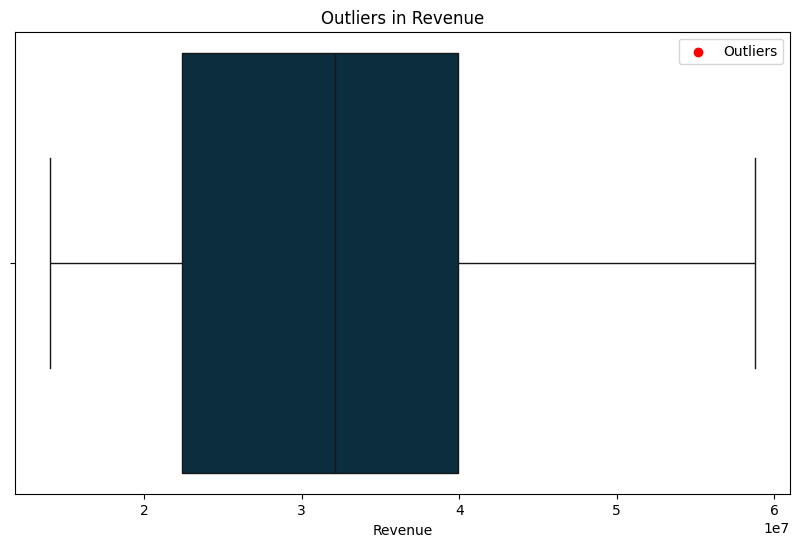

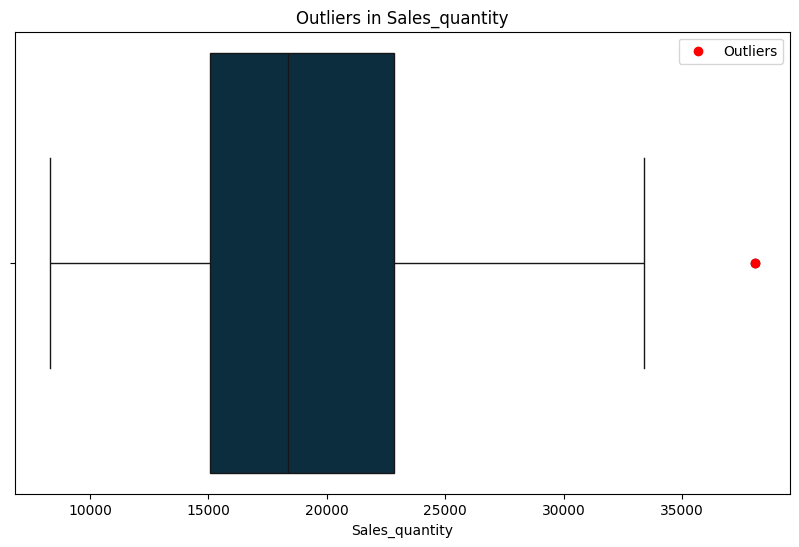

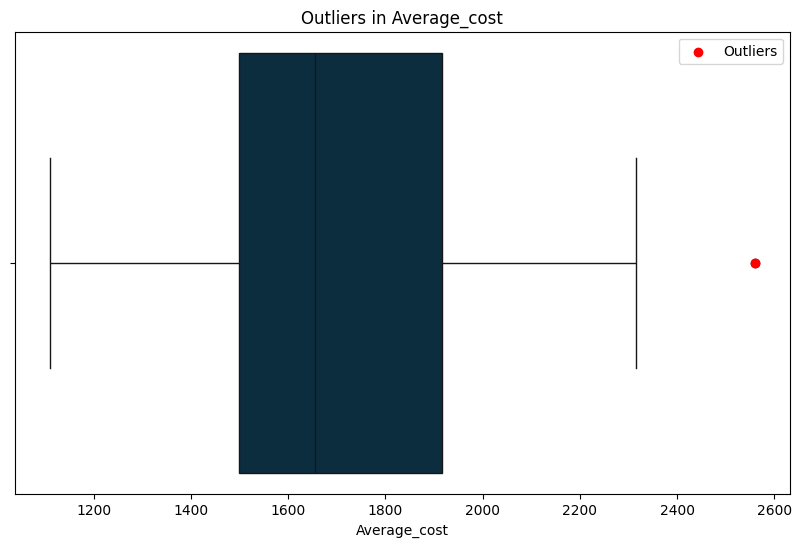

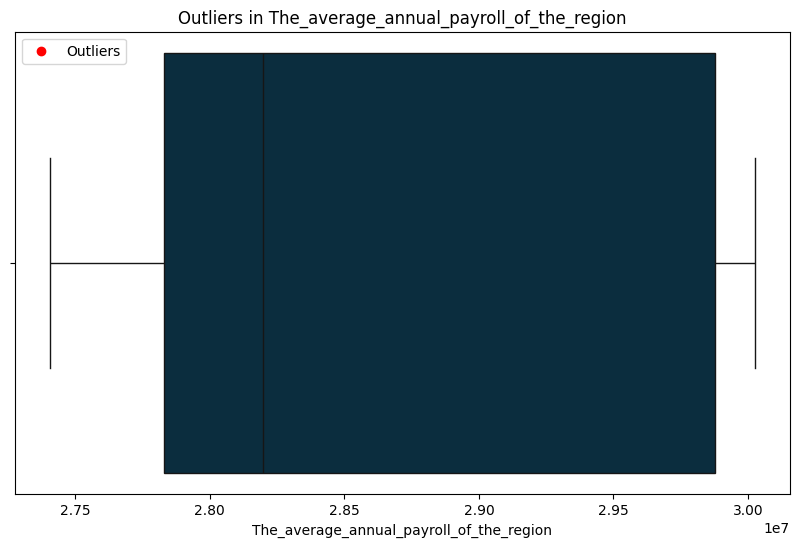

There are 2 outliers in the dataset.

Number (percentage) of outliers per feature: 

Revenue: 0 (0.0)%
Sales_quantity: 1 (1.56)%
Average_cost: 1 (1.56)%
The_average_annual_payroll_of_the_region: 0 (0.0)%


({'Revenue': [],
  'Sales_quantity': [59],
  'Average_cost': [55],
  'The_average_annual_payroll_of_the_region': []},
 {'Revenue': 0,
  'Sales_quantity': 1,
  'Average_cost': 1,
  'The_average_annual_payroll_of_the_region': 0},
 2)

In [45]:
check_outliers(data, features= ['Revenue', 'Sales_quantity', 'Average_cost', 'The_average_annual_payroll_of_the_region'], visualize=True)

# Análise de Dispersão: Quantidade de Vendas e Custo Médio vs Receita
Neste passo, criamos um gráfico de dispersão para analisar a relação entre a Quantidade de Vendas, o Custo Médio e a Receita. Essa análise é fundamental para entender como essas variáveis se relacionam e como podem impactar a Receita. 
- Ao analisar o gráfico, podemos observar que há uma correlação positiva entre a Quantidade de Vendas e a Receita, o que é esperado. Além disso, o Custo Médio também parece ter uma influência na Receita, embora menos pronunciada.
 
- Esta análise é crucial para identificar padrões e relacionamentos entre as variáveis, o que pode ajudar a informar decisões futuras sobre como otimizar a Receita. Além disso, essa análise nos permite entender qual variável devemos usar no nosso modelo para prever, que no caso, é a coluna Revenue.


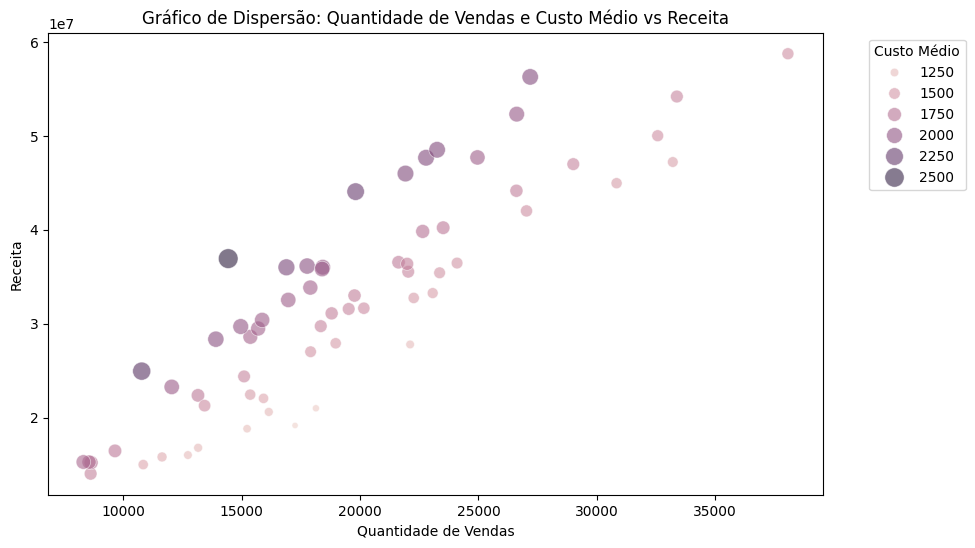

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Sales_quantity', y='Revenue', hue='Average_cost', size='Average_cost', sizes=(20, 200), alpha=0.6)
plt.title('Gráfico de Dispersão: Quantidade de Vendas e Custo Médio vs Receita')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Receita')
plt.legend(title='Custo Médio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Tratamento de Dados Faltantes

Neste passo, realizamos o filtro dos dados para identificar células com valores nulos. A presença de valores nulos pode comprometer a análise e a eficácia dos modelos preditivos, por isso é fundamental tratá-los adequadamente.

- **Identificação de Valores Nulos**: Utilizamos um filtro para identificação dos valores nulos no dataframe.

- **Exclusão de Linhas**: Após a identificação, optamos por excluir as linhas que contêm valores nulos. Essa abordagem é válida quando a quantidade de dados faltantes é pequena em relação ao total, garantindo que a integridade da análise não seja comprometida.

In [49]:
if data.isnull().any().any():
    data = data.dropna()
data.tail()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
59,01.12.2019,5.875647e+07,38069,1543.420464,29878525
60,01.01.2020,5.628830e+07,27184,2070.640850,29044998
61,01.02.2020,4.022524e+07,23509,1711.057181,29044998
62,01.03.2020,5.002217e+07,32569,1535.882748,29044998
63,01.04.2020,5.232069e+07,26615,1965.834790,29044998


# Normalização dos Dados

Neste passo, aplicamos um laço para normalizar todos os números do tipo **float** presentes no DataFrame. Essa normalização é realizada através da criação de uma escala de **1/1000**, com o objetivo de facilitar a visualização futura dos resultados.

In [50]:
for float in data.columns:
    if data[float].dtype == 'float64':
        data[float] = data[float] / 1000
data.head()


,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,16010.072120,12729,1.257764,30024676
1,01.02.2015,15807.587450,11636,1.358507,30024676
2,01.03.2015,22047.146024,15922,1.384697,30024676
3,01.04.2015,18814.583294,15227,1.235607,30024676
4,01.05.2015,14021.479612,8620,1.626622,30024676


# Redução das Casas Decimais

realizamos a redução das casas decimais dos valores do tipo **float** presentes no DataFrame. Essa ação é importante para melhorar a legibilidade dos dados e facilitar a interpretação dos resultados.

In [51]:
for float in data.columns:
    if data[float].dtype == 'float64':
        data[float] = data[float].apply(lambda x: round(x, 2))
data.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,16010.07,12729,1.26,30024676
1,01.02.2015,15807.59,11636,1.36,30024676
2,01.03.2015,22047.15,15922,1.38,30024676
3,01.04.2015,18814.58,15227,1.24,30024676
4,01.05.2015,14021.48,8620,1.63,30024676


# Formatação da Coluna 'Sales_quantity' para int64
Mudando o tipo do dado da coluna 'Sales_quantity' para int.

In [52]:
data['Sales_quantity'].dtype == 'int64'
data.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,16010.07,12729,1.26,30024676
1,01.02.2015,15807.59,11636,1.36,30024676
2,01.03.2015,22047.15,15922,1.38,30024676
3,01.04.2015,18814.58,15227,1.24,30024676
4,01.05.2015,14021.48,8620,1.63,30024676


# Formatação da Coluna 'Period' para Datetime

Realizamos a formatação da coluna **'Period'** para o tipo de dado **datetime**.


In [53]:
data['Period'] = pd.to_datetime(data['Period'], format= '%d.%m.%Y')
data.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,16010.07,12729,1.26,30024676
1,2015-02-01,15807.59,11636,1.36,30024676
2,2015-03-01,22047.15,15922,1.38,30024676
3,2015-04-01,18814.58,15227,1.24,30024676
4,2015-05-01,14021.48,8620,1.63,30024676


# Análise Descritiva dos Indicadores de Desempenho da Loja

- **Revenue**: Podemos observar que a média da receita gerada pela loja é de **32,360.45**, o que nos dá uma ideia do ganho médio mensal. Além disso, a receita máxima já registrada foi de **58,756.47**, o que pode ser utilizado para comparar meses considerados 'bons' e 'ruins'. Essa informação é crucial para entender a performance da loja ao longo do tempo e identificar padrões de sazonalidade ou eventos que possam ter influenciado as vendas.

- **Sales_quantity**: A média da quantidade de vendas é de **19,197.38** unidades por mês, com um mínimo de **8,314** e um máximo de **38,069**. Isso indica que, em média, a loja vende cerca de 19 mil unidades mensalmente, mas há meses em que as vendas podem ser significativamente menores ou maiores. Essa variação pode ser explorada para entender melhor os fatores que afetam a demanda.

- **Average_cost**: O custo médio por unidade é de **1.70**, com um mínimo de **1.11** e um máximo de **2.56**. Essa informação é importante para calcular a margem de lucro e avaliar a eficiência operacional da loja. A variação nos custos pode indicar mudanças nos fornecedores ou nos preços de aquisição dos produtos.

- **The_average_annual_payroll_of_the_region**: A média da folha de pagamento anual da região é de **28,690,829.63**, com um mínimo de **27,406,473.00** e um máximo de **30,024,676.00**. Essa métrica pode ser relevante para entender o poder aquisitivo da população local e como isso pode impactar as vendas da loja. Um aumento na folha de pagamento pode estar correlacionado a um aumento na demanda por produtos.

Esses dados nos fornecem uma visão abrangente do desempenho da loja e podem ser utilizados para embasar decisões estratégicas, como ajustes de preços, promoções e planejamento de estoque.

In [54]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Period,64,2017-08-16 03:45:00,2015-01-01 00:00:00,2016-04-23 12:00:00,2017-08-16 12:00:00,2018-12-08 18:00:00,2020-04-01 00:00:00,NaN
Revenue,64.0,32360.452812,14021.48,22426.545,32090.875,39929.9875,58756.47,11641.498776
Sales_quantity,64.0,19197.375,8314.0,15065.5,18368.0,22856.25,38069.0,6591.287257
Average_cost,64.0,1.695156,1.11,1.5,1.65,1.92,2.56,0.296926
The_average_annual_payroll_of_the_region,64.0,28690829.625,27406473.0,27828571.0,28197847.0,29878525.0,30024676.0,1057190.521818


In [55]:
data.to_csv('d:/project_hub/Linear-Regression for sales/input/VendasMensais_processed.csv', index=False)